<a href="https://colab.research.google.com/github/jineetd/NNFL/blob/master/train_2017A7PS0168G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! unzip -uq "/content/drive/My Drive/nnfl-assignment-i.zip" -d "/content/assg1"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,Input,MaxPooling2D


import os
import cv2

In [0]:
from skimage.io import imread_collection

#your path 
col_dir = 'assg1/final_train/final_train/*.jpg'

#creating a collection with the available images
X_train = imread_collection(col_dir)



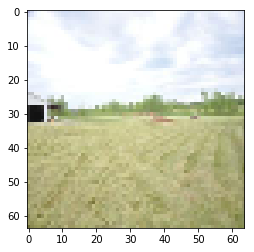

In [30]:
height = 64
width = 64
dim = (width, height)
x_train = []
for i in range(len(X_train)):
  res = cv2.resize(X_train[i], dim, interpolation=cv2.INTER_LINEAR)
  x_train.append(res)
plt.imshow(x_train[0])

In [31]:
#print(X_train[0].shape)
#type(X_train)
x_train=np.array(x_train).astype('float32')
x_train=x_train/255.
type(x_train)

numpy.ndarray

In [32]:
df=pd.read_csv('assg1/train_mappings_final.csv')
#print(df.columns.values)
y_train=np.array(df['train_mappings'])
#y_train=y_train.reshape(-1,1)
y_train=np.delete(y_train,0).astype('int32')

print(len(y_train))
#print(x_train.shape)

16575


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [35]:
#1)
#model = Sequential()

#model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#2)
#model = Sequential()

#model.add(Conv2D(64, (3, 3), input_shape=(64,64,3)))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Flatten())
#model.add(Dense(16))
#model.add(Activation("relu"))
#model.add(Dropout(0.5))
#model.add(Dense(1))
#model.add(Activation("sigmoid"))


#3)
#from keras.layers import Activation
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=40)


Train on 10608 samples, validate on 2652 samples
Epoch 1/10
10608/10608 [==============================] - 60s 6ms/step - loss: 0.2419 - acc: 0.9093 - val_loss: 0.1388 - val_acc: 0.9548
Epoch 2/10
10608/10608 [==============================] - 59s 6ms/step - loss: 0.1534 - acc: 0.9496 - val_loss: 0.1603 - val_acc: 0.9506
Epoch 3/10
10608/10608 [==============================] - 58s 6ms/step - loss: 0.1305 - acc: 0.9568 - val_loss: 0.1629 - val_acc: 0.9359
Epoch 4/10
10608/10608 [==============================] - 59s 6ms/step - loss: 0.1249 - acc: 0.9574 - val_loss: 0.1103 - val_acc: 0.9634
Epoch 5/10
10608/10608 [==============================] - 59s 6ms/step - loss: 0.1103 - acc: 0.9638 - val_loss: 0.1061 - val_acc: 0.9653
Epoch 6/10
10608/10608 [==============================] - 58s 6ms/step - loss: 0.1124 - acc: 0.9613 - val_loss: 0.0910 - val_acc: 0.9691
Epoch 7/10
10608/10608 [==============================] - 58s 5ms/step - loss: 0.0909 - acc: 0.9696 - val_loss: 0.1457 - val_acc:

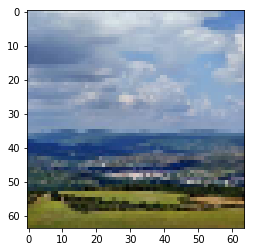

In [36]:
from skimage.io import imread_collection

#your path 
col_dir = 'assg1/final_test/final_test/*.jpg'

#creating a collection with the available images
X_test = imread_collection(col_dir)
height = 64
width = 64
dim = (width, height)
x_test = []
for i in range(len(X_test)):
  res = cv2.resize(X_test[i], dim, interpolation=cv2.INTER_LINEAR)
  x_test.append(res)
plt.imshow(x_test[0])

In [37]:
x_test=np.array(x_test)
print(x_test.shape)

(5125, 64, 64, 3)


In [0]:
y_pred=model.predict_classes(x_test)

In [40]:
df1=pd.read_csv('assg1/test_data_file_id.csv')
print(df1.columns.values)
df1['Category']=y_pred
print(df1.head())

['Id' 'File']
   Id                     File  Category
0   2  ./data/final_test/2.jpg         1
1   3  ./data/final_test/3.jpg         0
2   4  ./data/final_test/4.jpg         0
3   5  ./data/final_test/5.jpg         1
4   6  ./data/final_test/6.jpg         0


In [0]:
df1.to_csv('jineet6_output.csv',index=False)